/home/wyrgly/camacho/simphony/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/wyrgly/camacho/simphony/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


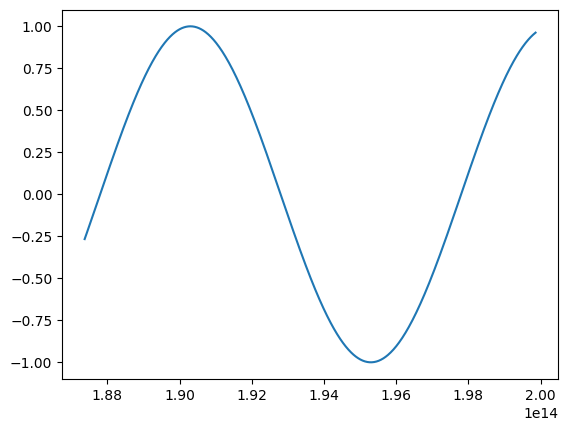

In [523]:
import matplotlib.pyplot as plt
from scipy.constants import speed_of_light as c
import numpy as np
from simphony.time_domain.vector_fitting.z_domain import vector_fitting_discrete, pole_residue_response_discrete
from simphony.libraries.ideal import waveguide
from simphony.utils import dict_to_matrix
from simphony.conventions import PHYSICIST, ENGINEER

wavelength = 1e-6 * np.linspace(1.5, 1.6, 1000)
group_index = 3.4
group_delay = 0.1e-12
length = c * group_delay / group_index
frequency = c/wavelength
bandwidth = np.max(frequency) - np.min(frequency)
f_c = 0.5*(np.max(frequency) + np.min(frequency))
f_s = 1e14


H = dict_to_matrix(waveguide(wl=1e6*wavelength, length=1e6*length, ng=group_index))
plt.plot(frequency, H[:, 0, 1])


# poles, residues, feedthrough, error = vector_fitting_discrete(48, H, frequency, f_c, f_s, max_iterations=100, sign_convention=PHYSICIST)

# H_model = pole_residue_response_discrete(frequency, f_c, f_s, poles, residues, feedthrough, sign_convention=PHYSICIST)

# plt.plot(frequency, H_model[:, 0, 1])

In [524]:
bandwidth*1e-12

np.float64(12.491352416666656)

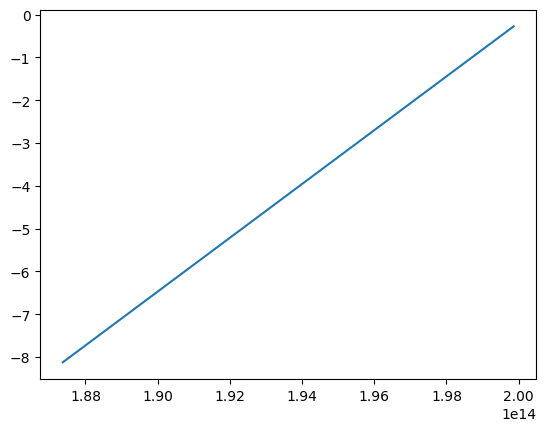

In [525]:
plt.plot(frequency, np.unwrap(np.angle(H[:, 0, 1])))

In [526]:
length

8.817425235294118e-06

In [527]:
bandwidth * 1e-12

np.float64(12.491352416666656)

In [528]:
import sax
from simphony.libraries.siepic import y_branch, waveguide

mzi, info = sax.circuit(
    netlist={
        "instances": {
            "gc_in": "gc",
            "splitter": "ybranch",
            "long_wg": "waveguide",
            "short_wg": "waveguide",
            "combiner": "ybranch",
            # "gc_out": "gc",
        },
        "connections": {
            "splitter,port 2": "long_wg,o0",
            "splitter,port 3": "short_wg,o0",
            "long_wg,o1": "combiner,port 2",
            "short_wg,o1": "combiner,port 3",
            # "combiner,port 1": "gc_out,o0",
        },
        "ports": {
            "in": "splitter,port 1",
            "out": "combiner,port 1",
        },
    },
    models={
        "ybranch": y_branch,
        "waveguide": waveguide,
    }
)

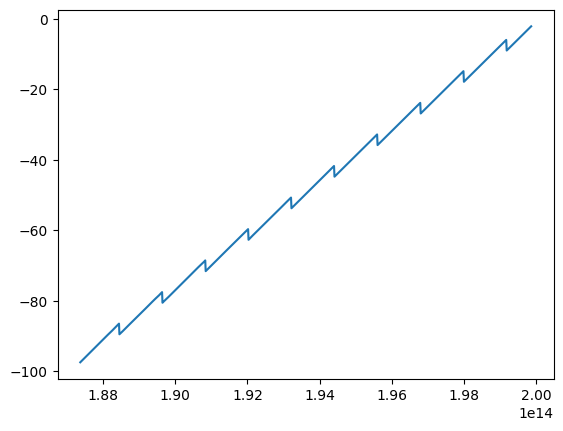

In [522]:
plt.plot(frequency, np.unwrap(np.angle(H_mzi[:, 0, 1])))

[[5.04433316e-12 3.82991304e-12]
 [3.82991304e-12 5.04433316e-12]]
5.593497414384759e-05


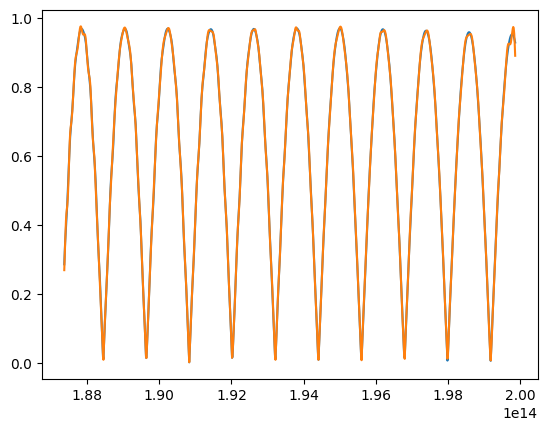

In [577]:
length = 200.0

H_mzi = dict_to_matrix(mzi(wl=1e6*wavelength, long_wg={"length": length + 60.0}, short_wg={"length": length}))
phase = np.unwrap(np.angle(H_mzi), axis=0)
group_delay = np.gradient(phase, 2*np.pi*frequency, axis=0)
avg_group_delay = np.abs(group_delay).mean(axis=0)
print(avg_group_delay)

plt.plot(frequency, np.unwrap(np.abs(H_mzi[:, 0, 1])))



poles, residues, feedthrough, error = vector_fitting_discrete(91, H_mzi, frequency, f_c, f_s, max_iterations=100, sign_convention=PHYSICIST)

H_model = pole_residue_response_discrete(frequency, f_c, f_s, poles, residues, feedthrough, sign_convention=PHYSICIST)

plt.plot(frequency, np.unwrap(np.abs(H_model[:, 0, 1])))
print(error)


In [183]:
group_delay.shape

(1000, 2, 2)